In [1]:
import skimage.io as io
import torch
from fastai.medical.imaging import *
import os
import glob
import cv2
import numpy as np

In [2]:
def loadImages (filename, plugin='simpleitk'):
    images=io.imread(filename,plugin=plugin)
    imgs = torch.tensor(images)
    brks = imgs.freqhist_bins(n_bins=3500);
    images = imgs.hist_scaled(brks)
    os.makedirs(f"promise12/images/{filename.split('.')[0]}", exist_ok=True)
    for i in range(images.shape[0]):
        cv2.imwrite(f"promise12/images/{filename.split('.')[0]}/{i:02d}.png", images[i].cpu().numpy()*255)


In [3]:
def loadImagesLabel (filename, plugin='simpleitk'):
    images=io.imread(filename,plugin=plugin)
    os.makedirs(f"promise12/masks/{filename.split('_')[0]}", exist_ok=True)
    #Resizing and stacking the slices
    for i in range(images.shape[0]):
        cv2.imwrite(f"promise12/masks/{filename.split('_')[0]}/{i:02d}.png", (np.array(images[i],'int8')))

In [4]:
train_imgs = sorted([f'train/Case{i:02d}.mhd' for i in range(50)])

In [5]:
train_masks = sorted(glob.glob('train/*_*.mhd'))

In [6]:
train_imgs[0], train_masks[0]

('train/Case00.mhd', 'train\\Case00_segmentation.mhd')

In [7]:
images=io.imread(train_imgs[0],plugin='simpleitk')
imgs = torch.tensor(images)
brks = imgs.freqhist_bins(n_bins=3500)
images2 = imgs.hist_scaled(brks)

In [8]:
from matplotlib import pyplot as plt

## Original

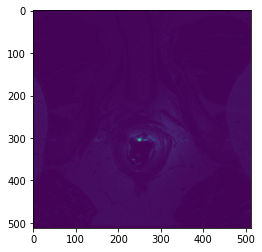

In [9]:
plt.imshow(images[0])

# Histogram Rescaled

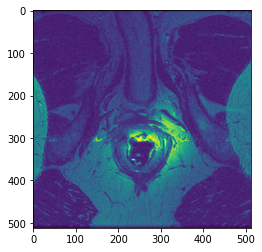

In [10]:
plt.imshow(images2[0])